In [24]:
%matplotlib inline

import math
import datetime
import random
from enum import IntEnum

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphviz

from sklearn import tree, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, Imputer

import community
import networkx as nx

In [19]:
# load the edge list and create a directed Graph
with open("hamster.edgelist", 'rb') as fh:
    G = nx.read_edgelist(fh,create_using=nx.DiGraph())

In [87]:
def pagerank(G):
    return pd.DataFrame.from_dict(nx.pagerank(G), orient='index').rename(columns={0:'pr'})

In [84]:
def vizualize(df):
    print('Pagerank distribution')
    df['pr'].plot.hist(bins=100)
    plt.show()
    
    print('Log scale')
    df['pr'].apply(np.log).plot.hist(bins=100)
    plt.show()

In [ ]:
def rank(df):
    return df.sort_values(by='pr', ascending=False)

In [100]:
def display_rank(df):
    ranking = rank(df)
    print("Top 10:\n")
    display(ranking.head(10))
    print("Lowest 10:\n")
    display(ranking.tail(10))

In [ ]:
def compute_error(base, df):
    br = rank(base)
    nr = rank(df)
    

#### Original graph

Pagerank distribution


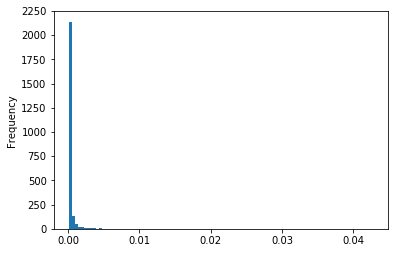

Log scale


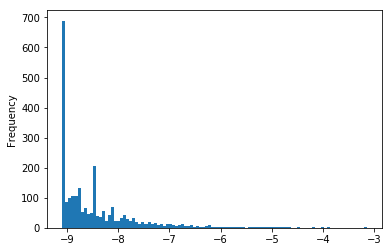

Top 10:



,pr
404,0.042793
195,0.019961
77,0.018628
728,0.015530
36,0.011117
135,0.009544
192,0.009365
281,0.009304
136,0.008853
184,0.008296


Lowest 10



,pr
1739,0.000113
918,0.000113
1743,0.000113
1744,0.000113
1745,0.000113
1746,0.000113
1748,0.000113
1749,0.000113
1751,0.000113
2426,0.000113


In [94]:
base = pagerank(G)
vizualize(base)
show_rank(base)

#### Graph with random edges removed

Pagerank distribution


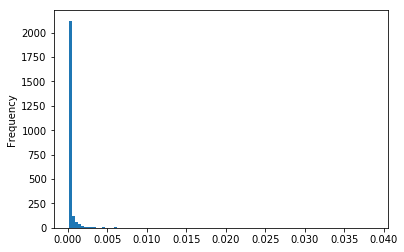

Log scale


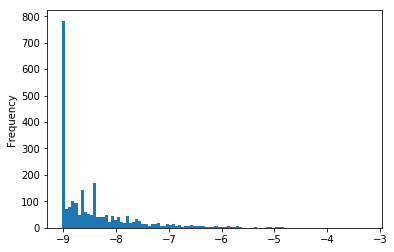

Top 10:



,pr
404,0.038680
195,0.015735
77,0.014176
192,0.013250
36,0.012262
728,0.010576
403,0.009028
346,0.008502
135,0.007952
184,0.007919


Lowest 10:



,pr
1841,0.000121
1842,0.000121
1120,0.000121
1118,0.000121
1116,0.000121
1846,0.000121
1115,0.000121
1848,0.000121
1113,0.000121
2426,0.000121


In [99]:
Gx = G.copy()
Gx.remove_edges_from(random.sample(G.edges(), 20*G.number_of_edges()//100))
pr = pagerank(Gx)
vizualize(pr)
show_rank(pr)